Notebook to compare the continuum surface theory to the discrete surface theory and full-scale numerics.

In [8]:
import weyl_surface as ws
import weyl_green as wg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from ipywidgets import interact
import weyl_spins as spins
import warnings
warnings.filterwarnings(action='ignore')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [157]:
import seaborn as sns
sns.set()
sns.set_style('ticks')

The full surface theory, when accounting for tunnelling, yields 5 equations:
\begin{equation}
\begin{aligned}
\alpha+\beta &=\gamma \\
\alpha w_{+}+\beta w_{-} &=\gamma w_{m} \\
\alpha \lambda_{+}+\beta \lambda_{-} &=\gamma \mu+r \gamma \\
\alpha \lambda_{+} w_{+} + \beta \lambda_{-} w_{-} &=\gamma \mu w_{m}+r \gamma w_{m} \\
\int|\psi|^{2} d y &=1
\end{aligned}
\end{equation}

The first 4 can be condensed into a single one:
\begin{equation}
0=\left(w_{m}-w_{-}\right) \lambda_{+} w_{+}-\left(w_{m}-w_{+}\right) \lambda_{-} w_{-}+2(\mu+r)\left(w_{+}-w_{-}\right) w_{m}=F(E)
\end{equation}
with
\begin{equation}
w_{m}=\frac{\lambda_{+} w_{-} - \lambda_{-} w_{+} + 2(\mu + r)(w_{+}-w_{-})}{\lambda_{+}-\lambda_{-}}
\end{equation}
where
\begin{equation}
w_{\pm}=\frac{h_z-\lambda_{\pm}^{2} / 2+E}{g_{1}+\lambda_{\pm}}
\end{equation}
and
\begin{equation}
\lambda_{\pm}^{2}=2 (1 + h_z) \pm 2 \sqrt{1 + 2 h_z + E^{2}-g_{1}^{2}}.
\end{equation}

## Numerical results

In [452]:
size = 20
res = 100
kz = np.pi/2
t = 1
tm = 0
g = 0
mu = -4
r = 2.3
krange = 1

# full spectrum
# kxs_full, Es_full, locs = wg.Spectrum(size=size,res=res,krange=krange,kz=kz,t=t,g=g,tm=tm,mu=mu,r=r)

# continuum surface theory
# kxs_surf, Es_surf = ws.EnergiesContinuum(krange=krange,kz=kz,g=g,mu=mu,r=r)

# discrete surface theory
# branch = -1
# p_idx = +1
# q_idx = +1
# kxs_disc, Es_disc = ws.Energies(branch=branch,p_idx=p_idx,q_idx=q_idx,krange=krange,kz=kz,t=t,g=g,mu=mu,r=r)

# define parameters in discrete model
# def pq_pm(qp,pm,kx,kz,t,g,mu):
#     g0 = -2 * t * (np.cos(kx) + np.cos(kz)) - mu 
#     g1 = t * np.sin(kx)
#     g3 = t * (2 + g - np.cos(kx) - np.cos(kz))
    
#     # decay parameters
#     if qp == "p":
#         p = (g0 - E) / (2*t) + p_idx * np.sqrt( (g0 - E)**2 / (4 * t**2) - 1)
#         return p
    
#     elif qp == "q":
#         gamma = (g1**2 + g3**2 + t**2 - E**2) / (g3 * t)
#         q = gamma / 2 + pm * np.sqrt( (gamma / 2)**2 - 1)
#         return q

In [1014]:
%matplotlib inline

kxs = np.linspace(-np.pi,np.pi,res)

def SpectrumPlot(kz=np.pi/2,r=2.3,continuum=False,discrete=True,branch_pp=True,branch_pm=False,branch_mp=False,branch_mm=False):
    # full spectrum
    kxs_full, Es_full, locs = wg.Spectrum(size=size,res=res,krange=krange,kz=kz,t=1,g=g,tm=tm,mu=mu,r=r)

    # surface theory
    if continuum:
        kxs_surf, Es_surf = ws.EnergiesContinuum(krange=krange,kz=kz,g=g,mu=mu,r=r)
    
    # discrete surface theory
    if discrete:
        kxs_disc_ppp, Es_disc_ppp = ws.Energies(branch=+1,p_idx=+1,q_idx=+1,krange=krange,kz=kz,t=t,g=g,tm=tm,mu=mu,r=r,adjusted=True)
        kxs_disc_ppm, Es_disc_ppm = ws.Energies(branch=+1,p_idx=+1,q_idx=-1,krange=krange,kz=kz,t=t,g=g,tm=tm,mu=mu,r=r,adjusted=True)
        kxs_disc_pmp, Es_disc_pmp = ws.Energies(branch=+1,p_idx=-1,q_idx=+1,krange=krange,kz=kz,t=t,g=g,tm=tm,mu=mu,r=r,adjusted=True)
        kxs_disc_pmm, Es_disc_pmm = ws.Energies(branch=+1,p_idx=-1,q_idx=-1,krange=krange,kz=kz,t=t,g=g,tm=tm,mu=mu,r=r,adjusted=True)
#         kxs_disc_mpp, Es_disc_mpp = ws.Energies(branch=-1,p_idx=+1,q_idx=+1,krange=krange,kz=kz,t=t,g=g,mu=mu,r=r,adjusted=True)
#         kxs_disc_mpm, Es_disc_mpm = ws.Energies(branch=-1,p_idx=+1,q_idx=-1,krange=krange,kz=kz,t=t,g=g,mu=mu,r=r,adjusted=True)
#         kxs_disc_mmp, Es_disc_mmp = ws.Energies(branch=-1,p_idx=-1,q_idx=+1,krange=krange,kz=kz,t=t,g=g,mu=mu,r=r,adjusted=True)
#         kxs_disc_mmm, Es_disc_mmm = ws.Energies(branch=-1,p_idx=-1,q_idx=-1,krange=krange,kz=kz,t=t,g=g,mu=mu,r=r,adjusted=True)

    # plot
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.scatter(kxs_full[np.logical_not(locs)],Es_full[np.logical_not(locs)],c='k',marker='.',alpha=0.2, label="Numerics")
    ax.scatter(kxs_full[locs],Es_full[locs],c='r',marker='.',s=50,label="Interface numerics")
    if continuum:
        ax.scatter(kxs_surf,Es_surf,c='orange',marker="o",s=10,alpha=0.2,label="Continuum")
    if discrete:
        if branch_pp:
            ax.scatter(kxs_disc_ppp,Es_disc_ppp,c="blue",marker="+",s=12,alpha=0.2,label="Discrete +++")
#             plt.scatter(kxs_disc_mpp,Es_disc_mpp,c="blue",marker="+",s=12,alpha=0.2,label="Discrete -++")
        if branch_pm:
            ax.scatter(kxs_disc_ppm,Es_disc_ppm,c="orange",marker="+",s=12,alpha=0.2,label="Discrete ++-")
#             plt.scatter(kxs_disc_mpm,Es_disc_mpm,c="orange",marker="+",s=12,alpha=0.2,label="Discrete -+-")
        if branch_mp:
            ax.scatter(kxs_disc_pmp,Es_disc_pmp,marker="+",s=12,alpha=0.2,label="Discrete +-+")
#             plt.scatter(kxs_disc_mmp,Es_disc_mmp,marker="+",s=12,alpha=0.2,label="Discrete --+")
        if branch_mm:        
            ax.scatter(kxs_disc_pmm,Es_disc_pmm,marker="+",s=12,alpha=0.2,label="Discrete +--")
#             plt.scatter(kxs_disc_mmm,Es_disc_mmm,marker="+",s=12,alpha=0.2,label="Discrete ---")
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.set_xlabel(r"$k_x$")
    ax.legend(loc=(1.04,0.8))

    return ax

@interact(kz=(-np.pi,np.pi,0.1),r=(0,3,0.1))
def SpectrumInteract(kz=np.pi/2,r=2.3,continuum=False,discrete=True,branch_pp=True,branch_pm=False,branch_mp=False,branch_mm=False):
    fig = SpectrumPlot(kz,r,continuum,discrete,branch_pp,branch_pm,branch_mp,branch_mm)
#     fig.show()

interactive(children=(FloatSlider(value=1.5707963267948966, description='kz', max=3.141592653589793, min=-3.14…

## Interface arcs

In [2]:
def CoordToRes(x,res,krange):
    # converts points to be able to plot them imshow
    return res / (2 * krange) * np.asarray(x) + res / 2

In [3]:
def ContinuumSpectrum(kz=0,t=1,g=0,tm=0,mu=-4,r=0):
    kxs = np.linspace(-np.pi,np.pi,num=1000)
    Es = np.linspace(-1.5,1.5,num=1000)
    kxs_ret = []
    Es_ret = []
    
    for i in range(1000):
        kx = kxs[i]
        for j in range(1000):
            E = Es[j]
            Phi = ws.SurfaceEnergyRelationContinuumBis(E=E,kx=kx,kz=kz,t=t,g=g,tm=tm,mu=mu,r=r)
            if np.around(np.real(Phi),decimals=3) == 1:
                kxs_ret.append(kx)
                Es_ret.append(E)
                
    return kxs_ret, Es_ret

def ContinuumArc(E=0,t=1,g=0,tm=0,mu=-4,r=0):
    kxs = np.linspace(-np.pi,np.pi,num=1000,endpoint=False)
    kzs = np.linspace(-np.pi,np.pi,num=1000,endpoint=False)
    kxs_ret = []
    kzs_ret = []
    
    for i in range(1000):
        kx = kxs[i]
        for j in range(1000):
            kz = kzs[j]
            Phi = ws.SurfaceEnergyRelationContinuumBis(E=E,kx=kx,kz=kz,t=t,g=g,tm=tm,mu=mu,r=r)
            if np.around(np.real(Phi),decimals=3) == 1:
                kxs_ret.append(kx)
                kzs_ret.append(kz)
                
    return kxs_ret, kzs_ret

def DiscreteSpectrum(kz=0,res=100,krange=np.pi,Erange=1.5,t=1,g=0,tm=0,mu=-4,r=0):
    kxs = np.linspace(-krange,krange,num=res)
    Es = np.linspace(-Erange,Erange,num=res)
    kxs_ret = []
    Es_ret = []
    
    for i in range(res):
        kx = kxs[i]
        for j in range(res):
            E = Es[j]
            Phi = ws.SurfaceEnergyRelation(E=E,branch=0,p_idx=+1,q_idx=+1,kx=kx,kz=kz,t=t,g=g,tm=tm,mu=mu,r=r)
            if np.around(Phi,decimals=2) == 0:
                kxs_ret.append(kx)
                Es_ret.append(E)
                
    return kxs_ret, Es_ret

def DiscreteArc(E=0,res=100,krange=np.pi,t=1,g=0,tm=0,mu=-4,r=0):
    kxs = np.linspace(-krange,krange,num=res,endpoint=True)
    kzs = np.linspace(-krange,krange,num=res,endpoint=True)
    kxs_ret = []
    kzs_ret = []
    
    for i in range(res):
        kx = kxs[i]
        for j in range(res):
            kz = kzs[j]
            Phi = ws.SurfaceEnergyRelation(E=E,branch=0,p_idx=+1,q_idx=+1,kx=kx,kz=kz,t=t,g=g,tm=tm,mu=mu,r=r)
            if np.around(Phi,decimals=2) == 0:
                kxs_ret.append(kx)
                kzs_ret.append(kz)
                
    return kxs_ret, kzs_ret

### Discrete formalism

The interface arc is defined by the self-consistent energy relation $    E_{\pm} - \frac{r^2}{E_{\pm}-g_0+\frac{t}{p}} = \pm \sqrt{g_1^2 + g_3^2 - \frac{tg_3}{q}}$ which sets a condition on the interface energy from the decaying state considerations.

In [480]:
r = 2.3
g = -0
E =  (4 / 2 - np.sqrt(2**2 + 1))*0 + 0.2
kz = np.pi/2*0
t = 1
tm = 0
M = 4
mu = -M
krange = np.pi
Erange = 1.5
res = 1000

kxs = np.linspace(-krange,krange,res,endpoint=False)
kzs = np.linspace(-krange,krange,res,endpoint=False)
Espace = np.linspace(-Erange,Erange,res)

xx, zz = np.meshgrid(kxs, kzs)
phi_discrete_0 = ws.SurfaceEnergyRelation(E=E,branch=-0,p_idx=+1,q_idx=1,kx=xx,kz=zz,t=t,g=g,tm=tm,mu=mu,r=0)
phi_discrete = ws.SurfaceEnergyRelation(E=E,branch=-0,p_idx=+1,q_idx=1,kx=xx,kz=zz,t=t,g=g,tm=tm,mu=mu,r=r)

xe, ee = np.meshgrid(kxs, Espace)
phi_discrete_spectrum_0 = ws.SurfaceEnergyRelation(E=ee,branch=-0,p_idx=+1,q_idx=1,kx=xe,kz=kz,t=t,g=g,tm=tm,mu=mu,r=0)
phi_discrete_spectrum = ws.SurfaceEnergyRelation(E=ee,branch=-0,p_idx=+1,q_idx=1,kx=xe,kz=kz,t=t,g=g,tm=tm,mu=mu,r=r)

# phi_discrete = np.zeros((res,res),dtype=float)

# for i in range(res):
#     kz = kzs[i]
#     for j in range(res):
#         kx = kxs[j]
# #         branch = -np.sign(kx)
#         phi_discrete[i,j] = ws.SurfaceEnergyRelation(E=E,branch=0,p_idx=+1,q_idx=+1,kx=kx,kz=kz,t=1,g=0,tm=tm,mu=mu,r=r)


<IPython.core.display.Javascript object>


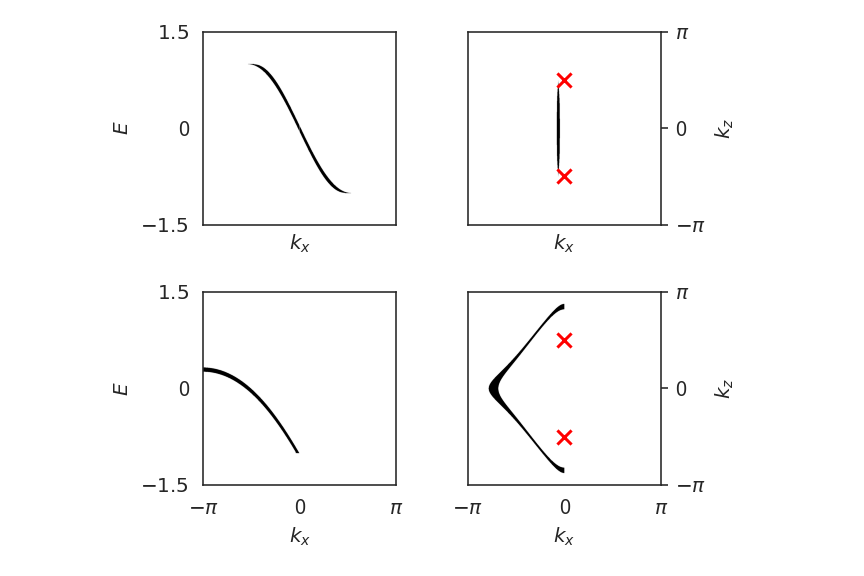

In [481]:
%matplotlib notebook

fig, ax = plt.subplots(nrows=2,ncols=2,sharex=True)

ax[0,0].imshow(np.around(phi_discrete_spectrum_0,decimals=1)==0,cmap="Greys")

ax[0,1].imshow(np.around(phi_discrete_0,decimals=1)==0,cmap="Greys")

ax[0,0].set_ylim(0,res)
ax[0,0].set_xlim(0,res)
ax[0,0].set_yticks([0,int(res/2),res])
ax[0,0].set_yticklabels(["$-1.5$","0","$1.5$"])
ax[0,0].set_xticks([0,int(res/2),res])
ax[0,0].set_xticklabels(["$-\pi$","0","$\pi$"])

ax[0,1].set_ylim(0,res)
ax[0,1].set_xlim(0,res)
ax[0,1].set_yticks([0,int(res/2),res])
ax[0,1].set_yticklabels(["$-\pi$","0","$\pi$"])

ax[0,1].scatter(int(res/2),int(res/4),s=50,c='r',marker='x')
ax[0,1].scatter(int(res/2),int(3*res/4),s=50,c='r',marker='x')

ax[0,0].set_xlabel(r"$k_x$")
ax[0,0].set_ylabel(r"$E$")
ax[0,1].set_xlabel(r"$k_x$")
ax[0,1].set_ylabel(r"$k_z$")
ax[0,1].yaxis.set_label_position("right")
ax[0,1].yaxis.tick_right()

ax[1,0].imshow(np.around(phi_discrete_spectrum,decimals=1)==0,cmap="Greys")

ax[1,1].imshow(np.around(phi_discrete,decimals=1)==0,cmap="Greys")

ax[1,0].set_ylim(0,res)
ax[1,0].set_xlim(0,res)
ax[1,0].set_yticks([0,int(res/2),res])
ax[1,0].set_yticklabels(["$-1.5$","0","$1.5$"])
ax[1,0].set_xticks([0,int(res/2),res])
ax[1,0].set_xticklabels(["$-\pi$","0","$\pi$"])

ax[1,1].set_ylim(0,res)
ax[1,1].set_xlim(0,res)
ax[1,1].set_yticks([0,int(res/2),res])
ax[1,1].set_yticklabels(["$-\pi$","0","$\pi$"])

ax[1,1].scatter(int(res/2),int(res/4),s=50,c='r',marker='x')
ax[1,1].scatter(int(res/2),int(3*res/4),s=50,c='r',marker='x')

# kx_special = -np.arcsin(r**2/M)
# kz_special = np.arccos(1-np.sqrt(1-r**4/M**2))
# kz_special = np.arccos(1/16)
# ax[1,1].scatter(CoordToRes(x=0,res=res,krange=krange),CoordToRes(x=kz_special,res=res,krange=krange),s=50,c='b',marker='x')
# ax[1,1].scatter(CoordToRes(x=0,res=res,krange=krange),CoordToRes(x=-kz_special,res=res,krange=krange),s=50,c='b',marker='x')


ax[1,0].set_xlabel(r"$k_x$")
ax[1,0].set_ylabel(r"$E$")
ax[1,1].set_xlabel(r"$k_x$")
ax[1,1].set_ylabel(r"$k_z$")
ax[1,1].yaxis.set_label_position("right")
ax[1,1].yaxis.tick_right()

plt.subplots_adjust(wspace=-0.75)
plt.tight_layout()

plt.show()

In [552]:
size=30
res=100
r = 1
w = 0
mu = -4
tm = 0
g = 0
t = 1
kz = np.pi/2*0
wrange = 1.5
krange = np.pi

As_0_gamma = np.zeros((res,res),dtype=float)
As_1_gamma = np.zeros((res,res),dtype=float)
As_23_gamma = np.zeros((res,res),dtype=float)
As_0_weyl = np.zeros((res,res),dtype=float)
As_1_weyl = np.zeros((res,res),dtype=float)
As_23_weyl = np.zeros((res,res),dtype=float)
As_0_kk = np.zeros((res,res),dtype=float)
As_1_kk = np.zeros((res,res),dtype=float)
As_23_kk = np.zeros((res,res),dtype=float)

kxs = np.linspace(-krange,krange,res)

for i in range(res):
    kx = kxs[i]
    As_0_gamma[:,i] = wg.FullSpectralFunctionWeylWK(size=size,res=res,wrange=wrange,kx=kx,kz=0,t=1,g=g,tm=tm,mu=mu,r=0,spin=0,side=1)
    As_1_gamma[:,i] = wg.FullSpectralFunctionWeylWK(size=size,res=res,wrange=wrange,kx=kx,kz=0,t=1,g=g,tm=tm,mu=mu,r=1,spin=0,side=1)
    As_23_gamma[:,i] = wg.FullSpectralFunctionWeylWK(size=size,res=res,wrange=wrange,kx=kx,kz=0,t=1,g=g,tm=tm,mu=mu,r=2.3,spin=0,side=1)
    As_0_weyl[:,i] = wg.FullSpectralFunctionWeylWK(size=size,res=res,wrange=wrange,kx=kx,kz=np.pi/2,t=1,g=g,tm=tm,mu=mu,r=0,spin=0,side=1)
    As_1_weyl[:,i] = wg.FullSpectralFunctionWeylWK(size=size,res=res,wrange=wrange,kx=kx,kz=np.pi/2,t=1,g=g,tm=tm,mu=mu,r=1,spin=0,side=1)
    As_23_weyl[:,i] = wg.FullSpectralFunctionWeylWK(size=size,res=res,wrange=wrange,kx=kx,kz=np.pi/2,t=1,g=g,tm=tm,mu=mu,r=2.3,spin=0,side=1)
    As_0_kk[:,i] = wg.FullSpectralFunctionWeylKK(w=w,size=size,res=res,krange=krange,kx=kx,t=1,g=g,tm=tm,mu=mu,r=0,spin=0,side=1)
    As_1_kk[:,i] = wg.FullSpectralFunctionWeylKK(w=w,size=size,res=res,krange=krange,kx=kx,t=1,g=g,tm=tm,mu=mu,r=1,spin=0,side=1)
    As_23_kk[:,i] = wg.FullSpectralFunctionWeylKK(w=w,size=size,res=res,krange=krange,kx=kx,t=1,g=g,tm=tm,mu=mu,r=2.3,spin=0,side=1)

In [553]:
res_new = 1000
factor = res / res_new

x_spectrum_gamma_0, y_spectrum_gamma_0 = DiscreteSpectrum(kz=0,res=res_new,krange=krange,Erange=wrange,t=t,g=g,tm=tm,mu=mu,r=0)
x_spectrum_gamma_1, y_spectrum_gamma_1 = DiscreteSpectrum(kz=0,res=res_new,krange=krange,Erange=wrange,t=t,g=g,tm=tm,mu=mu,r=1)
x_spectrum_gamma_23, y_spectrum_gamma_23 = DiscreteSpectrum(kz=0,res=res_new,krange=krange,Erange=wrange,t=t,g=g,tm=tm,mu=mu,r=2.3)

x_spectrum_weyl_0, y_spectrum_weyl_0 = DiscreteSpectrum(kz=np.pi/2,res=res_new,krange=krange,Erange=wrange,t=t,g=g,tm=tm,mu=mu,r=0)
x_spectrum_weyl_1, y_spectrum_weyl_1 = DiscreteSpectrum(kz=np.pi/2,res=res_new,krange=krange,Erange=wrange,t=t,g=g,tm=tm,mu=mu,r=1)
x_spectrum_weyl_23, y_spectrum_weyl_23 = DiscreteSpectrum(kz=np.pi/2,res=res_new,krange=krange,Erange=wrange,t=t,g=g,tm=tm,mu=mu,r=2.3)

x_arc_0, y_arc_0 = DiscreteArc(E=w,res=res_new,krange=krange,t=t,g=g,tm=tm,mu=mu,r=0)
x_arc_1, y_arc_1 = DiscreteArc(E=w,res=res_new,krange=krange,t=t,g=g,tm=tm,mu=mu,r=1)
x_arc_23, y_arc_23 = DiscreteArc(E=w,res=res_new,krange=krange,t=t,g=g,tm=tm,mu=mu,r=2.3)

In [554]:
def EGap(kx,kz,t=t,g=g):
    g1 = t * np.sin(kx)
    hz = t * (1 - np.cos(kx) - np.cos(kz))
    return np.sqrt(g1**2 + hz**2)

x_gap = np.linspace(-krange,krange,res_new)

y_gap_gamma = EGap(kx=x_gap,kz=0,t=t,g=g)
y_gap_weyl = EGap(kx=x_gap,kz=np.pi/2,t=t,g=g)

<IPython.core.display.Javascript object>


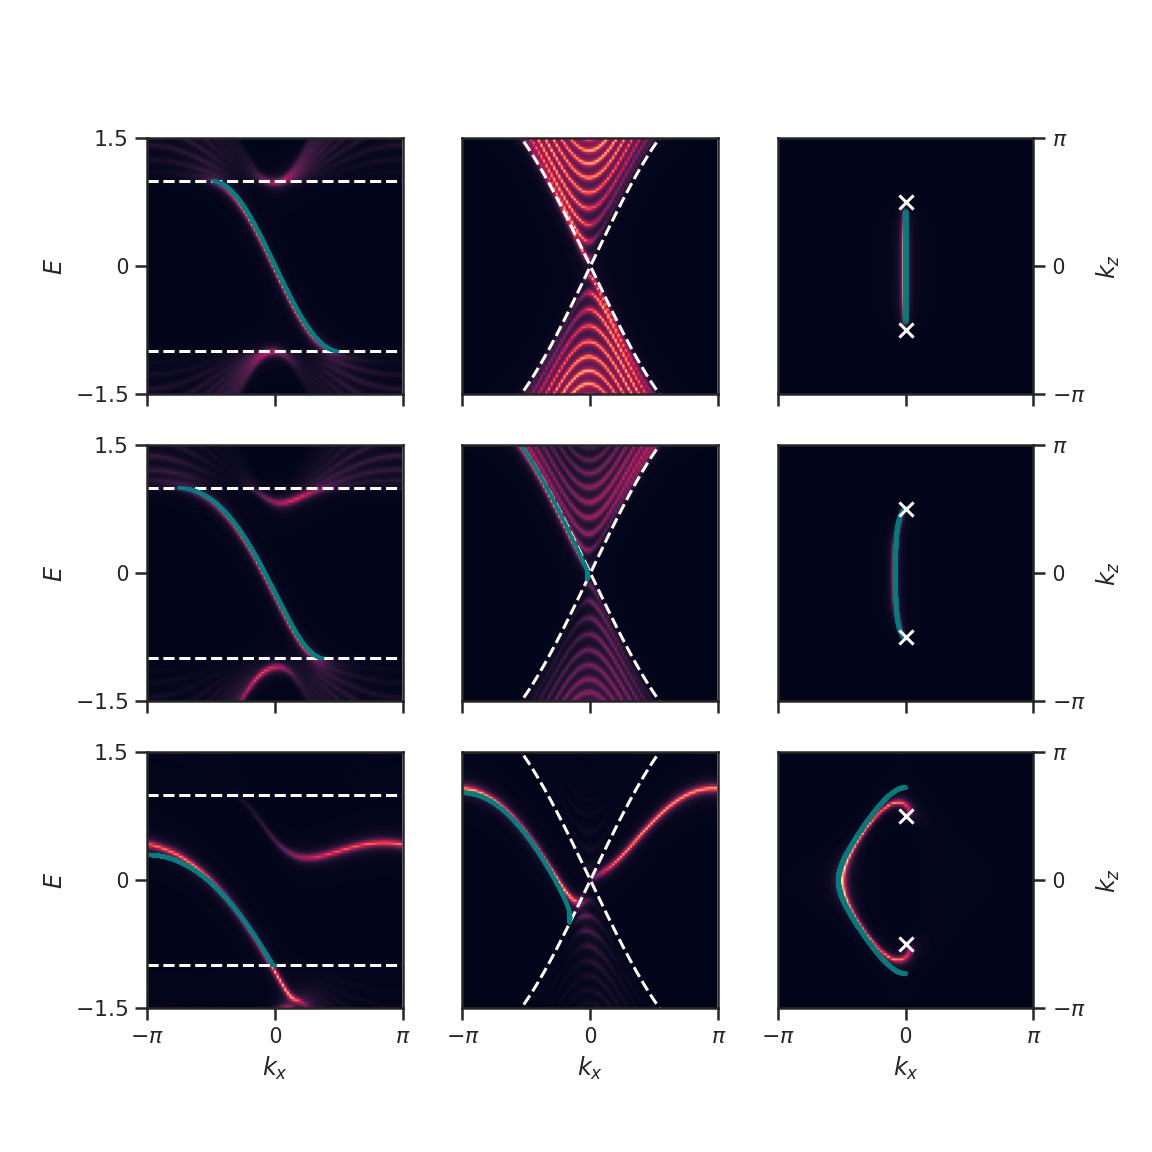

In [558]:
%matplotlib notebook

fig, ax = plt.subplots(nrows=3,ncols=3,sharex=True,figsize=(8,8))

### first row: no tunnelling

# first column: gamma spectrum

ax[0,0].imshow(As_0_gamma,alpha=1)

ax[0,0].plot(CoordToRes(x_gap,res_new,krange)*factor,CoordToRes(y_gap_gamma,res_new,wrange)*factor,ls='--',c='white',alpha=1)
ax[0,0].plot(CoordToRes(x_gap,res_new,krange)*factor,CoordToRes(-y_gap_gamma,res_new,wrange)*factor,ls='--',c='white',alpha=1)

ax[0,0].plot(CoordToRes(x_spectrum_gamma_0,res_new,krange)*factor,CoordToRes(y_spectrum_gamma_0,res_new,wrange)*factor,ls='-',c='teal',lw=2,alpha=1)

# ax[0,0].scatter(CoordToRes(-0.5,res,krange),CoordToRes(0.5,res,wrange))

# second column: weyl spectrum

ax[0,1].imshow(As_0_weyl,alpha=1)

ax[0,1].plot(CoordToRes(x_gap,res_new,krange)*factor,CoordToRes(y_gap_weyl,res_new,wrange)*factor,ls='--',c='white',alpha=1)
ax[0,1].plot(CoordToRes(x_gap,res_new,krange)*factor,CoordToRes(-y_gap_weyl,res_new,wrange)*factor,ls='--',c='white',alpha=1)

ax[0,1].plot(CoordToRes(x_spectrum_weyl_0,res_new,krange)*factor,CoordToRes(y_spectrum_weyl_0,res_new,wrange)*factor,ls='-',c='teal',lw=2,alpha=1)

# third column: interface arc

ax[0,2].imshow(As_0_kk,alpha=1)
ax[0,2].scatter(CoordToRes(x_arc_0,res_new,krange)*factor,CoordToRes(y_arc_0,res_new,krange)*factor,c='teal',lw=2,alpha=0.5,marker='.',s=0.3)

ax[0,2].scatter(int(res/2),int(res/4),s=50,c='white',marker='x')
ax[0,2].scatter(int(res/2),int(3*res/4),s=50,c='white',marker='x')

### second row: r = 1

# first column: gamma spectrum

ax[1,0].imshow(As_1_gamma,alpha=1)

ax[1,0].plot(CoordToRes(x_gap,res_new,krange)*factor,CoordToRes(y_gap_gamma,res_new,wrange)*factor,ls='--',c='white',alpha=1)
ax[1,0].plot(CoordToRes(x_gap,res_new,krange)*factor,CoordToRes(-y_gap_gamma,res_new,wrange)*factor,ls='--',c='white',alpha=1)

ax[1,0].plot(CoordToRes(x_spectrum_gamma_1,res_new,krange)*factor,CoordToRes(y_spectrum_gamma_1,res_new,wrange)*factor,ls='-',c='teal',lw=2,alpha=1)

# ax[1,0].scatter(CoordToRes(-0.5,res,krange),CoordToRes(0.2,res,wrange))

# second column: weyl spectrum

ax[1,1].imshow(As_1_weyl,alpha=1)

ax[1,1].plot(CoordToRes(x_gap,res_new,krange)*factor,CoordToRes(y_gap_weyl,res_new,wrange)*factor,ls='--',c='white',alpha=1)
ax[1,1].plot(CoordToRes(x_gap,res_new,krange)*factor,CoordToRes(-y_gap_weyl,res_new,wrange)*factor,ls='--',c='white',alpha=1)

ax[1,1].plot(CoordToRes(x_spectrum_weyl_1,res_new,krange)*factor,CoordToRes(y_spectrum_weyl_1,res_new,wrange)*factor,ls='-',c='teal',lw=2,alpha=1)

# third column: interface arc

ax[1,2].imshow(As_1_kk,alpha=1)
ax[1,2].scatter(CoordToRes(x_arc_1,res_new,krange)*factor,CoordToRes(y_arc_1,res_new,krange)*factor,c='teal',lw=2,alpha=0.5,marker='.',s=0.3)

ax[1,2].scatter(int(res/2),int(res/4),s=50,c='white',marker='x')
ax[1,2].scatter(int(res/2),int(3*res/4),s=50,c='white',marker='x')

### third row: r = 2.3

# first column: gamma spectrum

ax[2,0].imshow(As_23_gamma,alpha=1)

ax[2,0].plot(CoordToRes(x_gap,res_new,krange)*factor,CoordToRes(y_gap_gamma,res_new,wrange)*factor,ls='--',c='white',alpha=1)
ax[2,0].plot(CoordToRes(x_gap,res_new,krange)*factor,CoordToRes(-y_gap_gamma,res_new,wrange)*factor,ls='--',c='white',alpha=1)

ax[2,0].plot(CoordToRes(x_spectrum_gamma_23,res_new,krange)*factor,CoordToRes(y_spectrum_gamma_23,res_new,wrange)*factor,ls='-',c='teal',lw=2,alpha=1)

# second column: weyl spectrum

ax[2,1].imshow(As_23_weyl,alpha=1)

ax[2,1].plot(CoordToRes(x_gap,res_new,krange)*factor,CoordToRes(y_gap_weyl,res_new,wrange)*factor,ls='--',c='white',alpha=1)
ax[2,1].plot(CoordToRes(x_gap,res_new,krange)*factor,CoordToRes(-y_gap_weyl,res_new,wrange)*factor,ls='--',c='white',alpha=1)

ax[2,1].plot(CoordToRes(x_spectrum_weyl_23,res_new,krange)*factor,CoordToRes(y_spectrum_weyl_23,res_new,wrange)*factor,ls='-',lw=2,c='teal',alpha=1)

# third column: interface arc

ax[2,2].imshow(As_23_kk,alpha=1)
ax[2,2].scatter(CoordToRes(x_arc_23,res_new,krange)*factor,CoordToRes(y_arc_23,res_new,krange)*factor,c='teal',lw=2,alpha=0.5,marker='.',s=0.3)

ax[2,2].scatter(int(res/2),int(res/4),s=50,c='white',marker='x')
ax[2,2].scatter(int(res/2),int(3*res/4),s=50,c='white',marker='x')

# labels
for i in range(3):
    ax[i,0].set_ylabel(r"$E$")
    ax[i,2].set_ylabel(r"$k_z$")
    ax[i,2].yaxis.set_label_position("right")
    ax[i,2].yaxis.tick_right()
    
    ax[i,0].set_yticks([0,int(res/2),res])
    ax[i,0].set_yticklabels(["$-1.5$","0","$1.5$"])
    
    ax[i,1].set_yticks([])
#     ax[i,1].set_yticklabels(["$-1.5$","0","$1.5$"])
    
    ax[i,2].set_yticks([0,int(res/2),res])
    ax[i,2].set_yticklabels(["$-\pi$","0","$\pi$"])
    
    ax[2,i].set_xlabel(r"$k_x$")
    ax[2,i].set_xticks([0,int(res/2),res])
    ax[2,i].set_xticklabels(["$-\pi$","0","$\pi$"])

# universal settings
for i in range(3):
    for j in range(3):
        ax[i,j].set_ylim(0,res)
        ax[i,j].set_xlim(0,res)
plt.show()

### Continuous formalism

Here, the interface arc is defined by taking the usual termination on the interface (akin to continuity) while letting $ E \rightarrow E - \frac{\Delta^2}{E - M}$ or the more involved effective potential $ -\frac{\Delta^2}{\sqrt{(E - g_0)^2 - 4t_m^2}}$.

In [472]:
r = 1
g = -0
E = 0.9
kz = np.pi/2*0
t = 1
tm = 0
mu = -4
krange = np.pi
Erange = 1.5
res = 1000

kxs = np.linspace(-krange,krange,res,endpoint=False)
kzs = np.linspace(-krange,krange,res,endpoint=False)
Espace = np.linspace(-Erange,Erange,res)

xx, zz = np.meshgrid(kxs, kzs)
phi_cont_0 = ws.SurfaceEnergyRelationContinuumBis(E=E,kx=xx,kz=zz,t=t,g=g,tm=tm,mu=mu,r=0)
phi_cont = ws.SurfaceEnergyRelationContinuumBis(E=E,kx=xx,kz=zz,t=t,g=g,tm=tm,mu=mu,r=r)

xe, ee = np.meshgrid(kxs, Espace)
phi_cont_spectrum_0 = ws.SurfaceEnergyRelationContinuumBis(E=ee,kx=xe,kz=kz,t=t,g=g,tm=tm,mu=mu,r=0)
phi_cont_spectrum = ws.SurfaceEnergyRelationContinuumBis(E=ee,kx=xe,kz=kz,t=t,g=g,tm=tm,mu=mu,r=r)

<IPython.core.display.Javascript object>


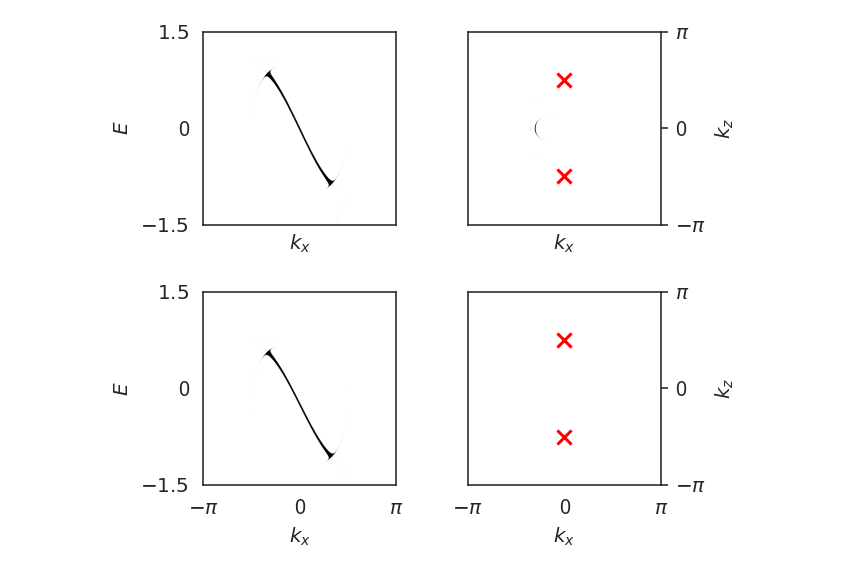

In [473]:
%matplotlib notebook

fig, ax = plt.subplots(nrows=2,ncols=2,sharex=True)

ax[0,0].imshow(np.around(np.real(phi_cont_spectrum_0),decimals=3)==1,cmap="Greys")

ax[0,1].imshow(np.around(np.real(phi_cont_0),decimals=3)==1,cmap="Greys")

ax[0,0].set_ylim(0,res)
ax[0,0].set_xlim(0,res)
ax[0,0].set_yticks([0,int(res/2),res])
ax[0,0].set_yticklabels(["$-1.5$","0","$1.5$"])
ax[0,0].set_xticks([0,int(res/2),res])
ax[0,0].set_xticklabels(["$-\pi$","0","$\pi$"])

ax[0,1].set_ylim(0,res)
ax[0,1].set_xlim(0,res)
ax[0,1].set_yticks([0,int(res/2),res])
ax[0,1].set_yticklabels(["$-\pi$","0","$\pi$"])

ax[0,1].scatter(int(res/2),int(res/4),s=50,c='r',marker='x')
ax[0,1].scatter(int(res/2),int(3*res/4),s=50,c='r',marker='x')

ax[0,0].set_xlabel(r"$k_x$")
ax[0,0].set_ylabel(r"$E$")
ax[0,1].set_xlabel(r"$k_x$")
ax[0,1].set_ylabel(r"$k_z$")
ax[0,1].yaxis.set_label_position("right")
ax[0,1].yaxis.tick_right()

ax[1,0].imshow(np.around(np.real(phi_cont_spectrum),decimals=3)==1,cmap="Greys")

ax[1,1].imshow(np.around(np.real(phi_cont),decimals=3)==1,cmap="Greys")

ax[1,0].set_ylim(0,res)
ax[1,0].set_xlim(0,res)
ax[1,0].set_yticks([0,int(res/2),res])
ax[1,0].set_yticklabels(["$-1.5$","0","$1.5$"])
ax[1,0].set_xticks([0,int(res/2),res])
ax[1,0].set_xticklabels(["$-\pi$","0","$\pi$"])

ax[1,1].set_ylim(0,res)
ax[1,1].set_xlim(0,res)
ax[1,1].set_yticks([0,int(res/2),res])
ax[1,1].set_yticklabels(["$-\pi$","0","$\pi$"])

ax[1,1].scatter(int(res/2),int(res/4),s=50,c='r',marker='x')
ax[1,1].scatter(int(res/2),int(3*res/4),s=50,c='r',marker='x')

ax[1,0].set_xlabel(r"$k_x$")
ax[1,0].set_ylabel(r"$E$")
ax[1,1].set_xlabel(r"$k_x$")
ax[1,1].set_ylabel(r"$k_z$")
ax[1,1].yaxis.set_label_position("right")
ax[1,1].yaxis.tick_right()

plt.subplots_adjust(wspace=-0.75)
plt.tight_layout()

plt.show()

### Interface formalism

In [966]:
M = 4
r = 0
g = -0
E = 0.
kz = 0
krange = np.pi
res = 1000
Erange = 1.5

kxs = np.linspace(-krange,krange,res)
kzs = np.linspace(-krange,krange,res)
Espace = np.linspace(-Erange,Erange,res)

xx, zz = np.meshgrid(kxs, kzs)
phi_interface = ws.SelfConsistentEnergyInterface(E=E,kx=xx,kz=zz,g=g,M=M,r=r)

xe, ee = np.meshgrid(kxs, Espace)
phi_interface_spectrum = ws.SelfConsistentEnergyInterface(E=ee,kx=xe,kz=kz,g=g,M=M,r=r)

<IPython.core.display.Javascript object>


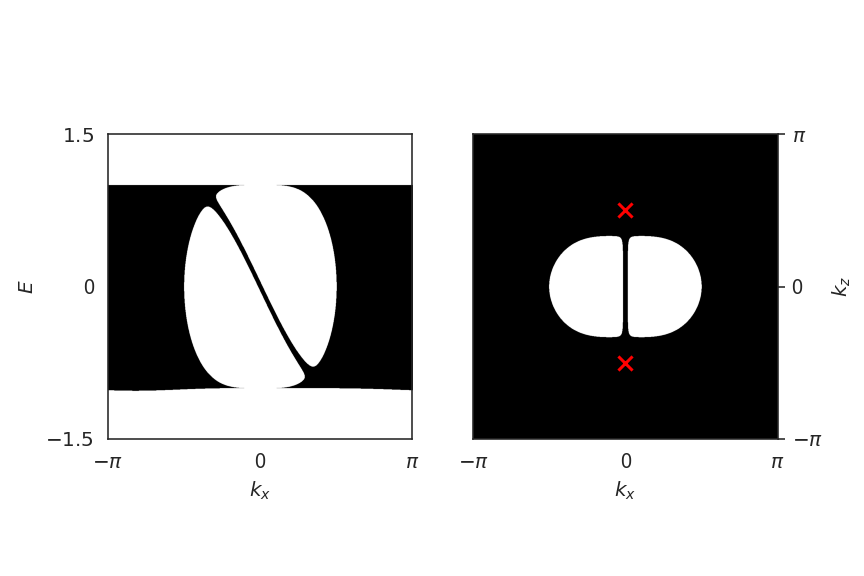

In [967]:
%matplotlib notebook

fig, ax = plt.subplots(nrows=1,ncols=2,sharex=True)

ax[0].imshow(np.around(np.imag(phi_interface_spectrum),decimals=1)==0,cmap="Greys")

ax[1].imshow(np.around(np.imag(phi_interface),decimals=1)==0,cmap="Greys")

ax[0].set_ylim(0,res)
ax[0].set_xlim(0,res)
ax[0].set_yticks([0,int(res/2),res])
ax[0].set_yticklabels(["$-1.5$","0","$1.5$"])
ax[0].set_xticks([0,int(res/2),res])
ax[0].set_xticklabels(["$-\pi$","0","$\pi$"])

ax[1].set_ylim(0,res)
ax[1].set_xlim(0,res)
ax[1].set_yticks([0,int(res/2),res])
ax[1].set_yticklabels(["$-\pi$","0","$\pi$"])

ax[1].scatter(int(res/2),int(res/4),s=50,c='r',marker='x')
ax[1].scatter(int(res/2),int(3*res/4),s=50,c='r',marker='x')

ax[0].set_xlabel(r"$k_x$")
ax[0].set_ylabel(r"$E$")
ax[1].set_xlabel(r"$k_x$")
ax[1].set_ylabel(r"$k_z$")
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()

plt.show()

Qualitatively, there is a good agreement.

The theories don't match too well. This is not so troubling for the continuum theory, as the numerics are discrete. The discrete theory is troubling. However, it seems to pinpoint the correct bulk momenta.

Can we match the surface states to the ones predicted by the continuum theory?

## Wavefunction matching

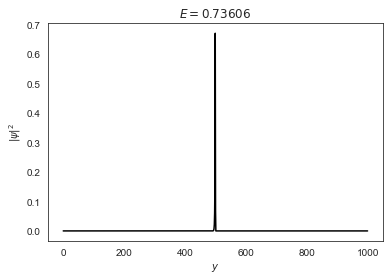

sx = -0.65, sz = 0.75
s**2 = 0.99


In [152]:
# take a known interface state
kx = -1
kz = np.pi / 2
r = 2.3
target = 0. # approximate value of E
t = 1
size = 1000
mu = -8
g = 0

H = wg.FullHamiltonian(size=size,kx=kx,kz=kz,t=t,g=g,tm=0,mu=mu,r=r)
Es, Ws = np.linalg.eigh(H)
idx = np.argmin(np.abs(Es - target))
state = Ws[:,idx]
prob = np.abs(state)**2
wvfct = [np.sum(prob[i:i+2]) for i in range(0, np.size(prob), 2)]

# plot it
plt.figure()
plt.title("$E={:.5}$".format(Es[idx]))
plt.plot(np.arange(size),wvfct,c='k')
plt.ylabel("$|\psi|^2$")
plt.xlabel("$y$")
plt.show()

# print spins values
sx,sy,sz=spins.Spin(state,size)
print("sx = {:.2}, sz = {:.2}".format(sx,sz))

# do they sum to 1?
print("s**2 = {:.2}".format(sx**2 + sz**2))

In [153]:
# set up fit parameters
hz = 1 + g - np.cos(kx) - np.cos(kz)
g1 = np.sin(kx)
h0 = -2 * (np.cos(kx) + np.cos(kz) + 1) - mu

def lambda_pm(pm,E):
    # decay lengths for WSM
    return np.sqrt(2*(1+hz) + pm * 2 * np.sqrt(1 + 2 * hz + E**2 - g1**2))

def mu_p(E):
    # decay length for metal
    return np.sqrt(h0 - E)

def w_pm(pm,E):
    # spin ratio for WSM
    return (hz + 1/2 * lambda_pm(pm,E)**2 + E) / (g1 + lambda_pm(pm,E))

def wm(E):
    # spin ratio for metal found with surface theory
    num = lambda_pm(+1,E) * w_pm(-1,E) + lambda_pm(-1,E) * w_pm(+1,E) + 2 * (mu_p(E) + r) * (w_pm(+1,E) - w_pm(-1,E))
    den = lambda_pm(+1,E) - lambda_pm(-1,E)
    return num / den

def WeylDecay(y,A,B,E):
    # ansatz for WSM wavefunction
    lambda_p = lambda_pm(+1,E)
    lambda_m = lambda_pm(-1,E)
    psi_w = A**2 * np.exp(2 * y * lambda_p) + B**2 * np.exp(2 * y * lambda_m) + 2 * A * B * np.exp(y * (lambda_p + lambda_m))
        
    return psi_w

def MetalDecay(y,C,E):
    # ansatz for metal wavefunction
    lambda_metal = mu_p(E)
    psi_m = C**2 * np.exp(- 2 * y * lambda_metal)
        
    return psi_m

In [154]:
from scipy.optimize import curve_fit

Esurf = Es[idx]

half_size = int(size / 2)

xdata_w = np.linspace(-half_size,0,half_size,endpoint=False)
ydata_w = wvfct[:half_size]
xdata_m = np.linspace(0,half_size,half_size,endpoint=True)
ydata_m = wvfct[half_size:]

[A_w,B_w],covw=curve_fit(lambda y, A, B: WeylDecay(y,A,B,Esurf),xdata_w,ydata_w,p0=[1,0])
[C_m],covm=curve_fit(lambda y, C: MetalDecay(y,C,Esurf),xdata_m,ydata_m,p0=[1])

<IPython.core.display.Javascript object>


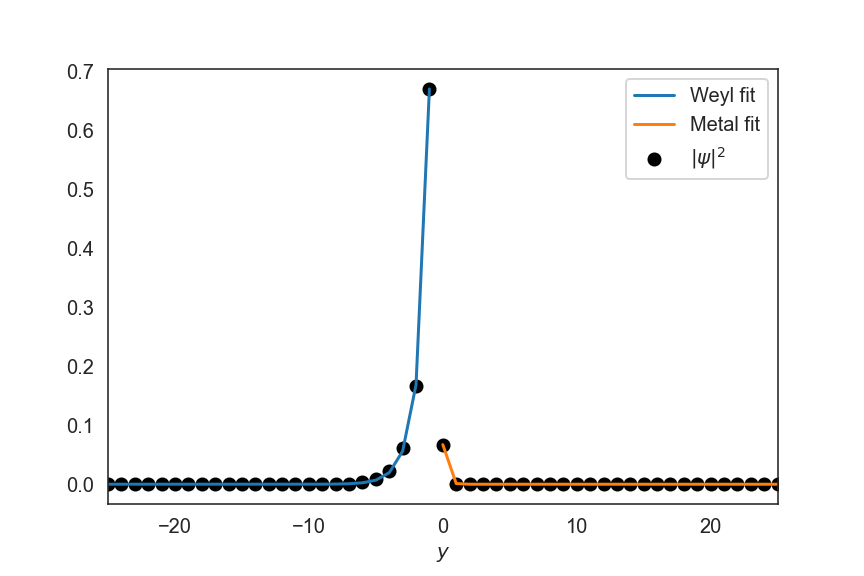

In [155]:
%matplotlib notebook

plt.figure()

# plt.plot(xdata_w,ydata_w,c='k')
# plt.plot(xdata_m,ydata_m,c='k')
plt.scatter(np.linspace(-half_size,half_size,size,endpoint=False),wvfct,c='k',label=r"$|\psi|^2$")

plt.plot(xdata_w,WeylDecay(xdata_w,A_w,B_w,Esurf),label="Weyl fit")
plt.plot(xdata_m,MetalDecay(xdata_m,C_m,Esurf),label="Metal fit")

plt.xlabel(r"$y$")

plt.xlim(-25,25)

plt.legend()

plt.show()

Continuum theory matches numerics with the help of 3 fit parameters (the amplitudes of each decay term).

In [26]:
# should equal 1
# but continuum has no reason to match with numerics, really
C_m**2 / (wm(Esurf)**2 + 1) * 1 / (2 * mu_p(Esurf)) + A_w**2 / (w_pm(+1,Esurf)**2 + 1) * 1 / (2 * lambda_pm(+1,Esurf)) + B_w**2  / (w_pm(-1,Esurf)**2 + 1) * 1 / (2 * lambda_pm(-1,Esurf)) + 2 * A_w * B_w / (np.sqrt(w_pm(+1,Esurf)**2 + 1) * np.sqrt(w_pm(-1,Esurf)**2 + 1)) * 1 / (lambda_pm(+1,Esurf) + lambda_pm(-1,Esurf))

0.24631069878120426

## Investigate wavefunctions

In [597]:
%matplotlib inline

size = 100
mu = -4
g = 0
t = 1
krange = 1.5
ys = np.arange(size)

@interact(target=(-1.5,1.5,0.01),kx=(-1,1,0.01),kz=(-np.pi,np.pi,0.01),r=(0,3,0.1))
def PlotWavefunction(target=0,kx=0,kz=0,r=0,branch_pp=False,branch_pm=False,zoom=False,spin=True):
    # set up plot
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
    
    # 1. spectrum 
    
    # full spectrum
    kxs_full, Es_full, locs = wg.Spectrum(size=size,res=res,krange=krange,kz=kz,t=1,g=g,tm=0,mu=mu,r=r)

    # add to plot
    ax[1].set_title("Full spectrum")
    ax[1].scatter(kxs_full[np.logical_not(locs)],Es_full[np.logical_not(locs)],c='k',marker='.',alpha=0.2, label="Numerics")
    ax[1].scatter(kxs_full[locs],Es_full[locs],c='r',marker='.',s=50,label="Interface numerics")
    ax[1].set_xlim(-krange,krange)
    ax[1].set_ylim(-1.5,1.5)
    ax[1].set_xlabel(r"$k_x$")
    ax[1].set_ylabel(r"$E$")
    ax[1].legend(loc=(1.3,0.8)) 
    
    # add in a point to show where we are scanning
    ax[1].scatter(kx,target,s=250,alpha=0.35,c='orange')
    
    # 2. eigenstate of interest plotted in y
    
    # Hamiltonian again
    H = wg.FullHamiltonian(size=size,kx=kx,kz=kz,t=t,g=g,tm=0,mu=mu,r=r)
    Es, Ws = np.linalg.eigh(H)
    idx = np.argmin(np.abs(Es - target))
    state = Ws[:,idx]
    prob = np.abs(state)**2
    wvfct = [np.sum(prob[i:i+2]) for i in range(0, np.size(prob), 2)]
    
    # plot it
    ax[0].set_title("$E={:.5}$".format(Es[idx]))
    ax[0].plot(ys,wvfct,c='r')
    ax[0].set_ylabel("$|\psi|^2$")
    ax[0].set_xlabel("$y$")
    ax[0].set_ylim(-1.01,1.01)
#     if zoom:
#         ax[0].set_xlim(,54)
    ax[0].axvline(14,c='pink',ls='--')
    
    # 3. spins
    if spin:
        sx,sy,sz=spins.SpinRealSpace(state,size)
        alphas = spins.Normalize(wvfct) # weight by probability
        rgba_colors_x = np.zeros((size,4))
        rgba_colors_z = np.zeros((size,4))
        # for red the first column needs to be one
        rgba_colors_x[:,0] = 1.0 # red
        rgba_colors_z[:,2] = 1.0 # blue
        # the fourth column needs to be your alphas
        rgba_colors_x[:, 3] = alphas
        rgba_colors_z[:, 3] = alphas
        # plot the spins
        ax[0].scatter(ys,sx,c=rgba_colors_x,label=r"$\sigma_x$")
        ax[0].scatter(ys,sz,c=rgba_colors_z,label=r"$\sigma_z$") 
        print("{}".format(sx[int(100/2-1)]))
        print("{}".format(sz[int(100/2-1)]))


interactive(children=(FloatSlider(value=0.0, description='target', max=1.5, min=-1.5, step=0.01), FloatSlider(…

In [108]:
def SpinsTunnelling(size,rmax,res,kx,target,kz,t,g,tm,mu):
    
    SX = np.zeros(res,dtype=float)
    SZ = np.zeros(res,dtype=float)
    rs = np.linspace(0,rmax,num=res)
     
    for i in range(res):
        r = rs[i]

        H = wg.FullHamiltonian(size=size,kx=kx,kz=kz,t=t,g=g,tm=tm,mu=mu,r=r)
        Es, Ws = np.linalg.eigh(H)
        idx = np.argmin(np.abs(Es - target))
        state = Ws[:,idx]
        
        sx,sy,sz=spins.SpinRealSpace(state,size)
        
        sx_int = sx[int(size/2-1)]
        sz_int = sz[int(size/2-1)]
        
        SX[i] = sx_int
        SZ[i] = sz_int
        
    return rs, SX, SZ
    
def EnergiesDiscrete(kx=0,kz=0,res=100,Erange=1.5,t=1,g=0,tm=0,mu=-4,r=0):
    Es = np.linspace(-Erange,Erange,num=res)
    Es_ret = []
    
    for i in range(res):
        E = Es[i]
        Phi = ws.SurfaceEnergyRelation(E=E,branch=0,p_idx=+1,q_idx=+1,kx=kx,kz=kz,t=t,g=g,tm=tm,mu=mu,r=r)
        if np.around(Phi,decimals=2) == 0:
            Es_ret.append(E)
            
    return np.asarray(Es_ret)

def SpinsTunnellingDiscrete(rmax,res,Erange,kx,kz,t,g,tm,mu):
        
    SX = np.zeros(res,dtype=float)
    SZ = np.zeros(res,dtype=float)
    
    rs = np.linspace(0,rmax,num=res)
    
    for i in range(res):
        r = rs[i]
        # get energies
        Es = EnergiesDiscrete(kx=kx,kz=kz,res=res,Erange=Erange,t=t,g=g,tm=tm,mu=mu,r=r)
        # take mean
        E = np.mean(Es)
        # compute spins
        spins = (E - r**2 / (E + mu) + np.sin(kx)) / (-(2 + g - np.cos(kz) - np.cos(kx)))
        N = np.sqrt(spins**2 + 1)
        
        sx_disc = (spins**2-1)/N**2
        sz_disc = -2*spins/N**2
        
        SX[i] = sx_disc
        SZ[i] = sz_disc
    
    return SX, SZ

In [109]:
SX_disc_gamma, SZ_disc_gamma = SpinsTunnellingDiscrete(rmax=2.4,kx=-0.5,kz=0,res=1000,Erange=1.,t=1,g=0,tm=0,mu=-4)

SX_disc, SZ_disc = SpinsTunnellingDiscrete(rmax=2.4,kx=-0.7,kz=np.pi/2,res=1000,Erange=1.,t=1,g=0,tm=0,mu=-4)

In [216]:
# rs, SX_gamma, SZ_gamma = SpinsTunnelling(rmax=2.4,res=100,kx=-0.7,target=0.01,size=100,kz=0,t=1,g=0,tm=0,mu=-4)
# rs, SX_gamma_bulk, SZ_gamma_bulk = SpinsTunnelling(rmax=2.4,res=100,kx=0.,target=0.51,size=100,kz=0,t=1,g=0,tm=0,mu=-4)

rs, SX, SZ = SpinsTunnelling(rmax=2.4,res=100,kx=-0.5,target=0.01,size=100,kz=np.pi/2,t=1,g=0,tm=0,mu=-4)
# rs, SX_bulk, SZ_bulk = SpinsTunnelling(rmax=2.4,res=100,kx=0.5,target=0.01,size=100,kz=np.pi/2,t=1,g=0,tm=0,mu=-4)

<IPython.core.display.Javascript object>


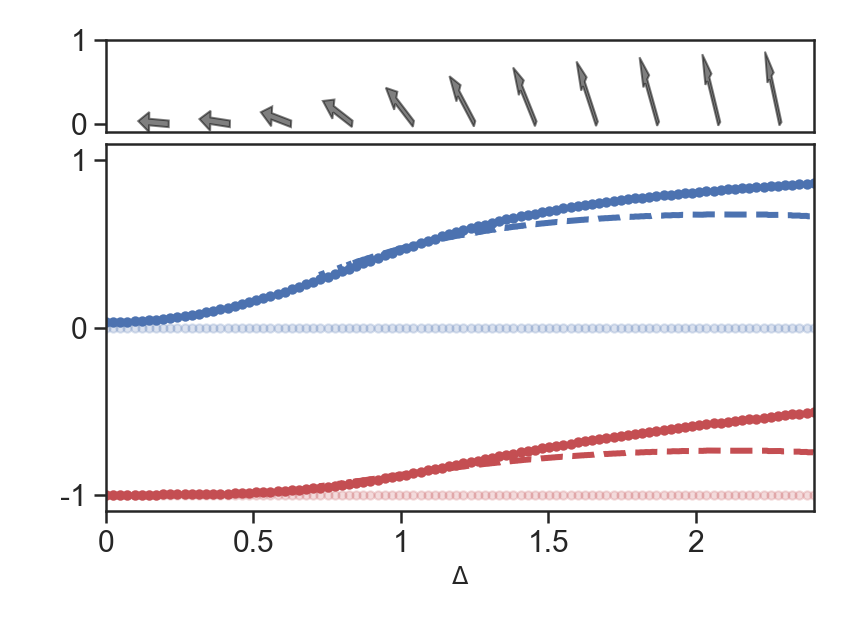

In [232]:
%matplotlib notebook

fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(4,4),gridspec_kw={'height_ratios': np.array([[1],[4]])})

for i in range (11):
    x_base = i
    if i == 0:
        index = 0
    else:
        index = (i-1)*10 + 9
        
    ax[0].arrow(2*i+1,0,SX[index],SZ[index],width=0.08,length_includes_head=True,color='black',alpha=0.5)

ax[0].set_ylim(-0.1,1.0)
# ax[0].set_xlim(-1.1,10.1)
ax[0].set_xticks([])
ax[0].set_yticks([0,1])
ax[0].set_yticklabels(["0","1"],fontsize='15')

rs = np.linspace(0,2.4,num=100)
rs_disc = np.linspace(0,2.4,num=1000)

ax[1].scatter(rs,SX,c='r',marker='.',s=70,label=r"$<{\sigma_x}>$")
ax[1].scatter(rs,SZ,c='b',marker='.',s=70,label=r"$<{\sigma_z}>$")

ax[1].scatter(rs,np.full(100,-1),c='r',marker='.',s=70,alpha=0.2,label=r"$<{\sigma_x}>$")
ax[1].scatter(rs,np.full(100,0),c='b',marker='.',s=70,alpha=0.2,label=r"$<{\sigma_z}>$")

ax[1].plot(rs_disc,SX_disc,c='r',ls='dashed',lw=3,alpha=1)
ax[1].plot(rs_disc,SZ_disc,c='b',ls='dashed',lw=3,alpha=1)

# plt.plot(rs,SX_gamma,c='r',ls='-',lw=3,label=r"$<{\sigma_x}>$")
# plt.plot(rs,SZ_gamma,c='b',ls='-',lw=3,label=r"$<{\sigma_z}>$")

# plt.plot(rs_disc,SX_disc_gamma,c='r',ls='-',lw=3,alpha=0.5)
# plt.plot(rs_disc,SZ_disc_gamma,c='b',ls='-',lw=3,alpha=0.5)

# plt.plot(rs,SX_bulk,c='r',ls='--')
# plt.plot(rs,SZ_bulk,c='b',ls='--')

ax[1].set_ylim(-1.1,1.1)
ax[1].set_yticks([-1,0,1])
ax[1].set_yticklabels(["-1","0","1"],fontsize="15")

ax[1].set_xlim(0,2.4)
ax[1].set_xticks([0,0.5,1,1.5,2])
ax[1].set_xticklabels(["0","0.5","1","1.5","2"],fontsize="15")

ax[1].set_xlabel("$\Delta$")

fig.tight_layout()

fig.subplots_adjust(hspace=0.05)

# plt.legend(loc='best')

plt.show()

In [79]:
kx1 = -0.5
kx2 = 0.

kz = np.pi / 2
r = 2.3
target1 = -0.75
target2 = 1
t = 1
size = 100
mu = -8
g = 0

# @interact(kx=(-np.pi,np.pi,0.1),kz=(-np.pi,np.pi,0.1),r=(0,3,0.1))
# def LocalizedWaves(kx=0,kz=0,r=1.3):
H = wg.FullHamiltonian(size=size,kx=kx1,kz=kz,t=t,g=g,mu=mu,r=r)
Es, Ws = np.linalg.eigh(H)
idx1 = np.argmin(np.abs(Es - target1))
state1 = Ws[:,idx1]
prob1 = np.abs(state1)**2
wvfct1 = [np.sum(prob1[i:i+2]) for i in range(0, np.size(prob1), 2)]

H = wg.FullHamiltonian(size=size,kx=kx2,kz=kz,t=t,g=g,mu=mu,r=r)
Es, Ws = np.linalg.eigh(H)
idx2 = np.argmin(np.abs(Es - target2))
state2 = Ws[:,idx2]
prob2 = np.abs(state2)**2
wvfct2 = [np.sum(prob2[i:i+2]) for i in range(0, np.size(prob2), 2)]

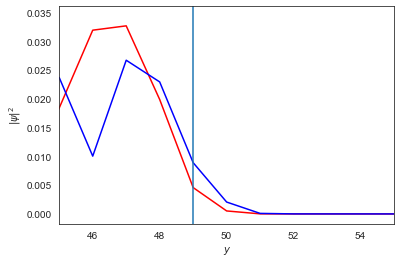

In [82]:
# plot it
plt.figure()
# plt.title("$E={:.5}$".format(Es[idx1]))
plt.plot(np.arange(size),wvfct1,c='r')
plt.plot(np.arange(size),wvfct2,c='b')
plt.ylabel("$|\psi|^2$")
plt.xlabel("$y$")
plt.xlim(45,55)
plt.axvline(49)
plt.show()

## Perturbation theory

Effective theory tells us to treat system as 1d chain with effective energy on the last site $E \rightarrow E - \frac{\Delta^2}{E - M}$.

In the perturbative approach, $H = H_{\parallel} + H_{\perp}$ can be solved with $H_{\parallel}$ as a perturbation. Indeed, $H_{\parallel}(k_{\parallel}) = 0$ at Weyl nodes.

In [192]:
%matplotlib notebook

kz = np.pi/2*0
r = 1.5
M = 4
g = 0
size = 50
res = 1000
krange = np.pi
tm = 0
mu = -4
t = 1

kxs = np.linspace(-krange,krange,res)

E0 = -np.sin(kxs)
E0_disc = -np.sqrt(np.sin(kxs)**2 + 2*(1 + g - np.cos(kxs) - np.cos(kz))**2)
Eb = np.sqrt(np.sin(kxs)**2 + (1 + g - np.cos(kxs) - np.cos(kz))**2)


# E_pert = kcorr - r**2 / (M - kcorr)
E_pert0 = (M+E0) / 2 - 1 / 2 * np.sqrt((M-E0)**2)
E_pert = (M+E0) / 2 - 1 / 2 * np.sqrt((M-E0)**2 + 4*r**2)

kxs_full0, Es_full0, locs0 = wg.Spectrum(size=size,res=res,krange=krange,kz=kz,t=t,g=g,tm=tm,mu=mu,r=0)
kxs_full, Es_full, locs = wg.Spectrum(size=size,res=res,krange=krange,kz=kz,t=t,g=g,tm=tm,mu=mu,r=r)

<IPython.core.display.Javascript object>


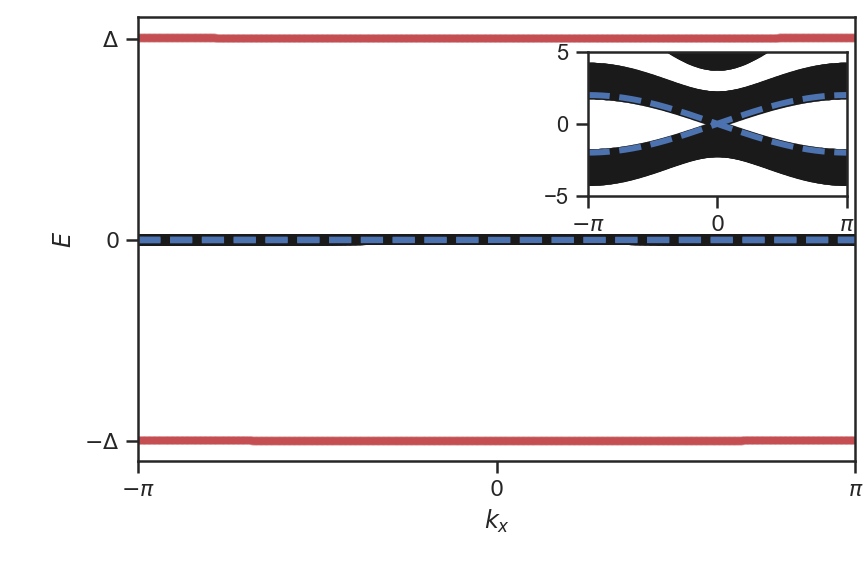

In [106]:
%matplotlib notebook

fig, ax = plt.subplots(figsize=(6,4))

fig.subplots_adjust(left=0.16, bottom=0.2, right=0.99, top=0.97)

plt.scatter(kxs_full[np.logical_not(locs)],Es_full[np.logical_not(locs)],c='k',marker='.',alpha=0.2, label="Numerics")
plt.scatter(kxs_full[locs],Es_full[locs],c='r',marker='.',alpha=0.2,label="Interface numerics")

plt.plot(kxs,Eb,c='b',ls='--',lw=3,alpha=1)
plt.plot(kxs,-Eb,c='b',ls='--',lw=3,alpha=1)

plt.xlim(-np.pi,np.pi)

plt.xticks([-np.pi,0,np.pi],labels=["$-\pi$","$0$","$\pi$"])

plt.yticks([-r,0,r],labels=["$-\Delta$","$0$","$\Delta$"])

plt.ylabel(r"$E$")
plt.xlabel(r"$k_x$")

# plt.plot(ks,es)
# plt.xlabel(r"$k_x$")
# plt.ylabel(r"$E$")
ax = fig.add_axes([0.68, 0.66, 0.3, 0.25]) 
ax.scatter(kxs_full[np.logical_not(locs)],Es_full[np.logical_not(locs)],c='k',marker='.',alpha=0.2, label="Numerics")
ax.scatter(kxs_full[locs],Es_full[locs],c='r',marker='.',alpha=0.2,label="Interface numerics")

ax.plot(kxs,Eb,c='b',ls='--',lw=3,alpha=1)
ax.plot(kxs,-Eb,c='b',ls='--',lw=3,alpha=1)
ax.set_ylim(-5,5)
ax.set_xlim(-np.pi,np.pi)

ax.set_xticks([-np.pi,0,np.pi])
ax.set_xticklabels(["$-\pi$","$0$","$\pi$"])


plt.show()

plt.show()

<IPython.core.display.Javascript object>


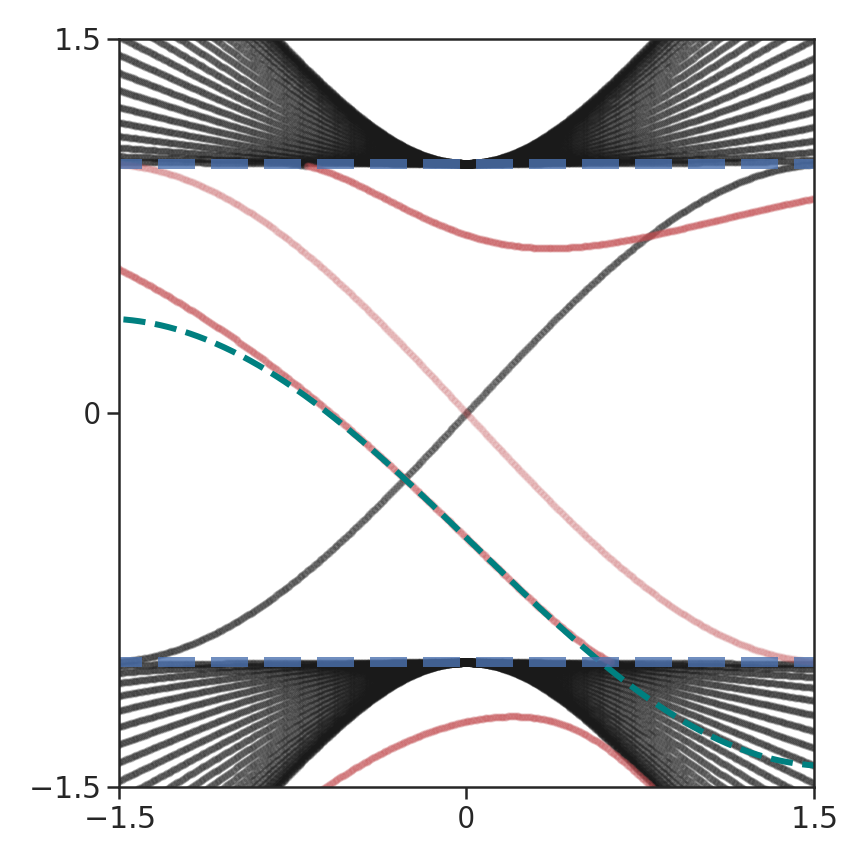

In [210]:
fig, ax = plt.subplots(ncols=1,figsize=(6,6),sharex=True,sharey=False)

# ax.scatter(kxs_full0[np.logical_not(locs0)],Es_full0[np.logical_not(locs0)],c='k',marker='.',alpha=0.2, label="Numerics")
# ax.scatter(kxs_full0[locs0],Es_full0[locs0],c='r',marker='.',alpha=0.2,label="Interface numerics")

ax.scatter(kxs_full[np.logical_not(locs)],Es_full[np.logical_not(locs)],c='k',marker='.',alpha=0.2, label="Numerics")
ax.scatter(kxs_full[locs],Es_full[locs],c='r',marker='.',alpha=0.2,label="Interface numerics")

ax.plot(kxs,E_pert,c='teal',ls='--',lw=3,alpha=1)

ax.plot(kxs,Eb,c='b',ls='--',lw=5,alpha=0.8)
ax.plot(kxs,-Eb,c='b',ls='--',lw=5,alpha=0.8)

ax.scatter(kxs,E_pert0,c='r',ls='-',marker='.',alpha=0.1)

ax.set_ylim(-1.5,1.5)
ax.set_xlim(-1.5,1.5)

ax.set_xticks([-1.5,0,1.5])
ax.set_xticklabels(["$-1.5$","0","$1.5$"],fontsize='15')

ax.set_yticks([-1.5,0,1.5])
ax.set_yticklabels(["$-1.5$","0","$1.5$"],fontsize='15')

# ax.set_ylabel(r"$E$")
# ax.set_xlabel(r"$k_x$")

plt.tight_layout()

plt.show()

compare numerics to analytics

In [220]:
r = 1.5
M = 4
kx = -0.0001
kz = np.pi/2
tm = 0
branch = +1
q_idx = +1
p_idx = +1

Es = np.linspace(-1.5,1.5,100000)

# define hamiltonian terms
g1 = (t * np.sin(kx)).astype(complex)
g3 = (t * (2 + g - np.cos(kx) - np.cos(kz))).astype(complex)

# decay parameters
gamma = (g1**2 + g3**2 + t**2 - Es**2) / (2 * g3 * t)
q = gamma + (q_idx) * np.sqrt((gamma)**2 - 1)

# tunnelling term
tun = r**2 / (Es - M)

# right-hand-side
rhs = (branch) * np.sqrt(g1**2 + g3**2 - g3 * t / q)

# all together (right now (over me))
phi_num_manual = Es - tun - rhs 

phi_num = ws.SurfaceEnergyRelation(Es,branch=0,p_idx=1,q_idx=1,kx=kx,kz=kz,t=1,g=0,tm=0,mu=-M,r=r)

# phi_ana_manual = Es - tun - (g1)

In [216]:
# doesn't work
Ed = Es - r**2 / (Es - M)

gsq = g1**2 + g3**2

ret = (Ed**2 - gsq)**2 + (Ed**2 - gsq) * (gsq + t**2 - Es**2) + g3**2

(-1.0, 1.0)

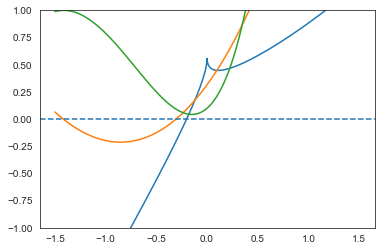

In [221]:
%matplotlib inline
plt.plot(Es,phi_num)
plt.plot(Es,phi_num_new)
plt.plot(Es,ret)
# plt.plot(Es,phi_num_manual,ls='--')
# plt.plot(Es,phi_ana_manual)
plt.axhline(y=0,ls='--')
plt.ylim(-1,1)

In [188]:
kx = 0
kz = np.pi/2
r = 1
M = 4
tm = 0
g = 0
t = 1

phi_check = ws.SurfaceEnergyRelation(Es,branch=+1,p_idx=1,q_idx=1,kx=kx,kz=kz,t=1,g=0,tm=0,mu=-M,r=r)

In [189]:
real_idx = np.isnan(phi_check)==False

In [190]:
np.where(np.diff(np.sign(phi_check[real_idx])))

(array([47861]),)

In [191]:
Es[real_idx][47861]

-0.06415564155641551

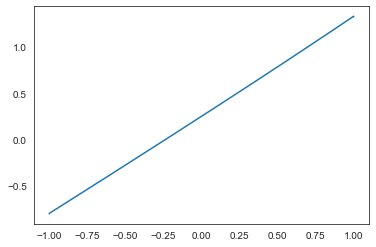

In [178]:
plt.plot(Es,phi_check)